# Import

In [157]:
import csv
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from nltk import word_tokenize
from tqdm import tqdm
import japanize_matplotlib

## Add configuration file

In [158]:
sys.path.append("/home/jovyan/core/config/")
sys.path.append("/home/jovyan/core/util/")

In [159]:
from ALL import config 
from util import *

## Set condition

In [160]:
tqdm.pandas()
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 50)

In [161]:
data_type = "AgNewsTitle"
vectorize_type = "sentenceBERT"

# Read data

In [162]:
df = pd.read_csv(f"../../Preprocessing/data/{data_type}/master.csv", index_col=0)

In [163]:
with open(f"../../Preprocessing/data/{data_type}/class.csv", mode="r") as f:
    reader = csv.reader(f)
    class_labels = [label for label in reader]

In [164]:
class_nums = config["data"][data_type]["class_num"]

# Top Text

In [165]:
vector_dim = 384
covariance_type = "full"
model_num = 0
normalization="normalized"

In [166]:
dist = np.load(f"../../Clustering/data/{data_type}/{vectorize_type}/GMM/dist/{vector_dim}/{normalization}/{covariance_type}/{model_num}.npy")
prob = np.load(f"../../Clustering/data/{data_type}/{vectorize_type}/GMM/prob/{vector_dim}/{normalization}/{covariance_type}/{model_num}.npy")

In [167]:
def getmax_rev(series, topnum=100, getmin=False, getindex=False):
    out = series.nsmallest(topnum) if getmin else series.nlargest(topnum)
    return out.index if getindex else out.set_axis(pd.RangeIndex(1, topnum+1))

In [176]:
title_labels = ["予測：world", "予測：sports",  "予測：business", "予測：sci/tech"]

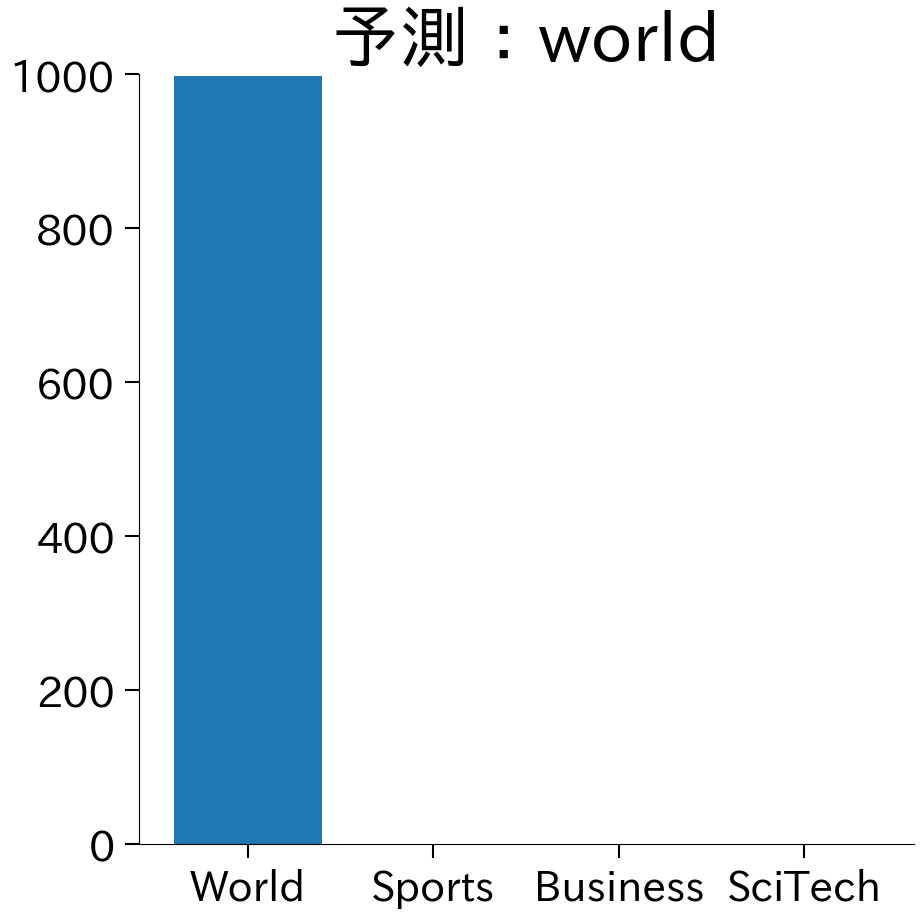

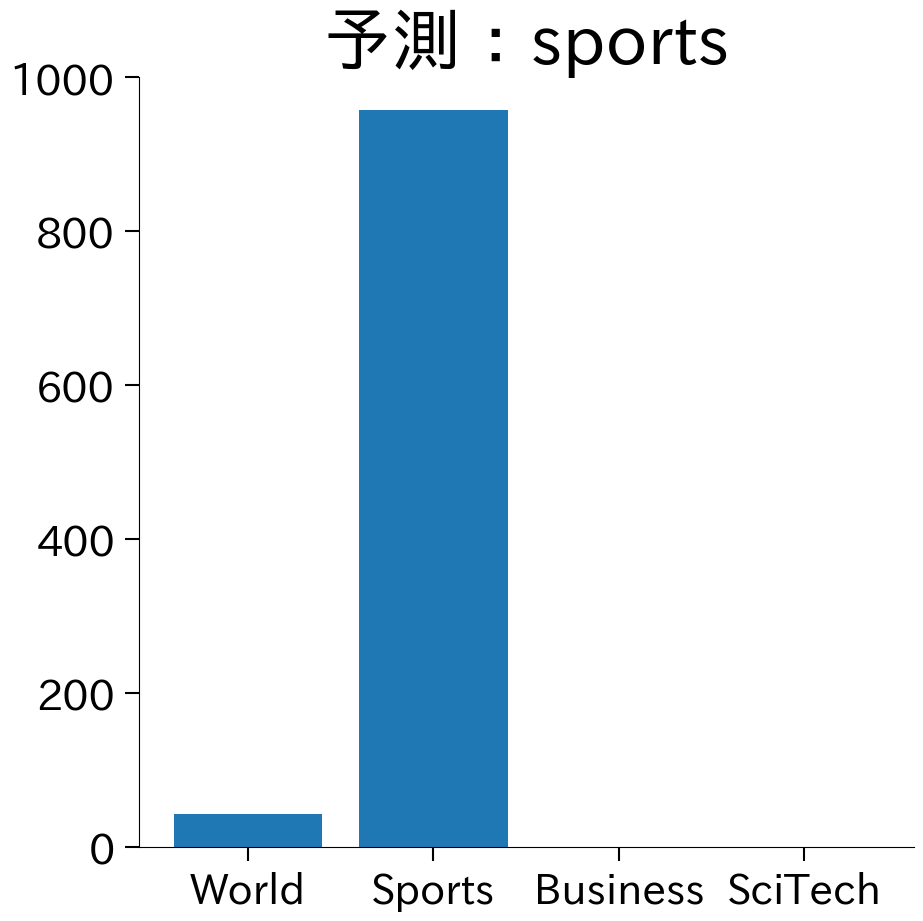

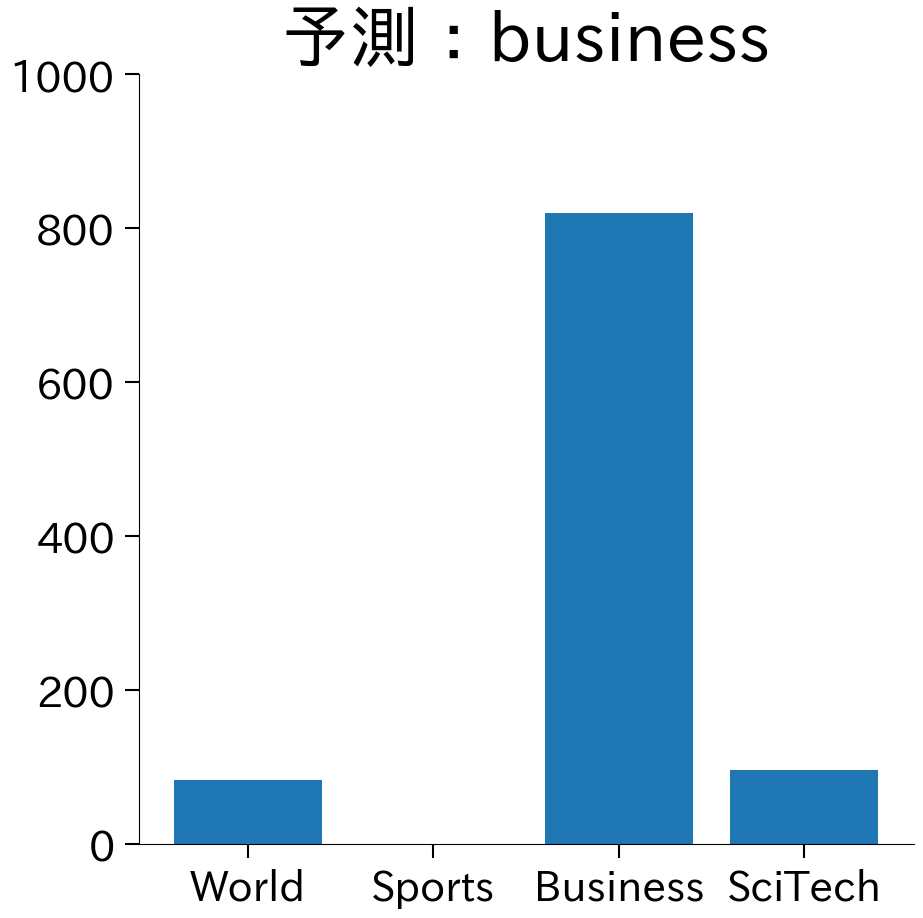

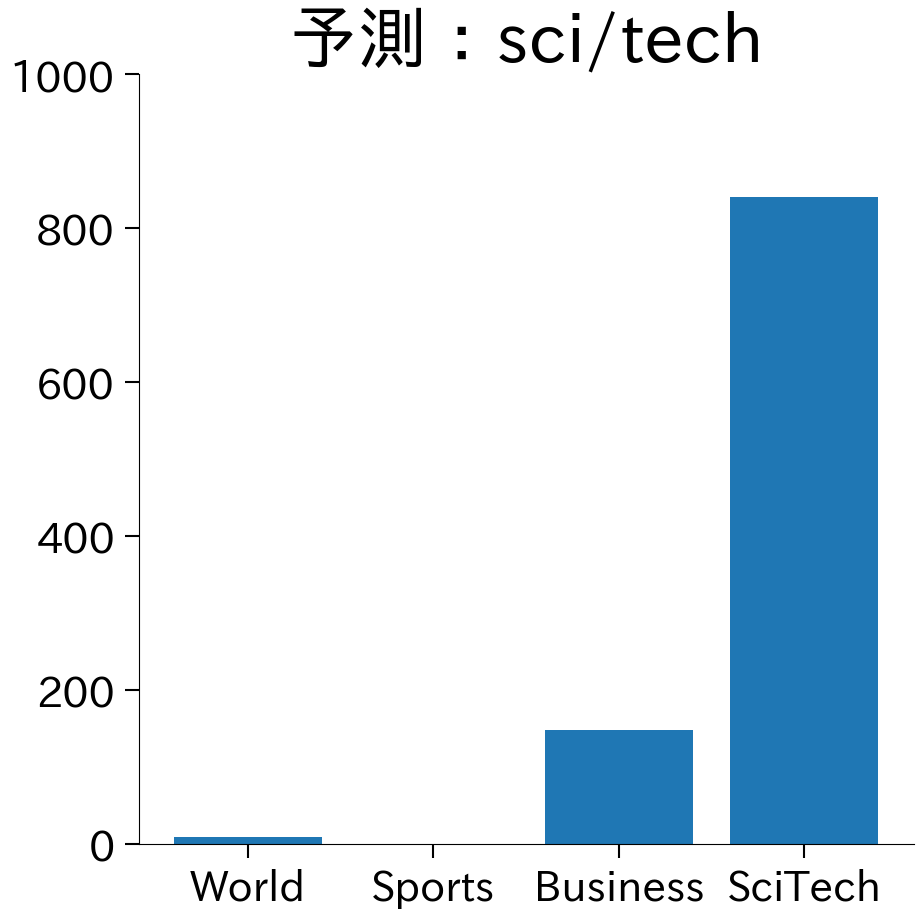

In [186]:
for i, class_num in enumerate([3, 1, 2, 0]):
    fig_path = f"../data/figure/{data_type}/top_texts/top_text_{data_type}_{title_labels[i].replace('/', '')}.pdf"
    fig = plt.figure(figsize=(10, 10))
    #     fig.subplots_adjust(left=0.1)#, bottom=0.25)

    dist_df = pd.DataFrame(dist)
    top_index = getmax_rev(dist_df[class_num], topnum=1000, getmin=True, getindex=True)
    ax = fig.add_subplot(111)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.tick_params(which="both", width=1.5, length=8, size=10, direction="out")
    ax.xaxis.set_tick_params(labelsize=30, pad=7)
    ax.yaxis.set_tick_params(labelsize=30, pad=7)

    ax.set_title(title_labels[i], size=50)

    ax.set_ylim(0, 1000)

    plt.bar(
        *zip(
            *{
                class_label: (df.loc[top_index, "class"] == class_label).sum()
                for class_label in class_labels[0]
            }.items()
        )
    )
    fig.savefig(make_filepath(fig_path))

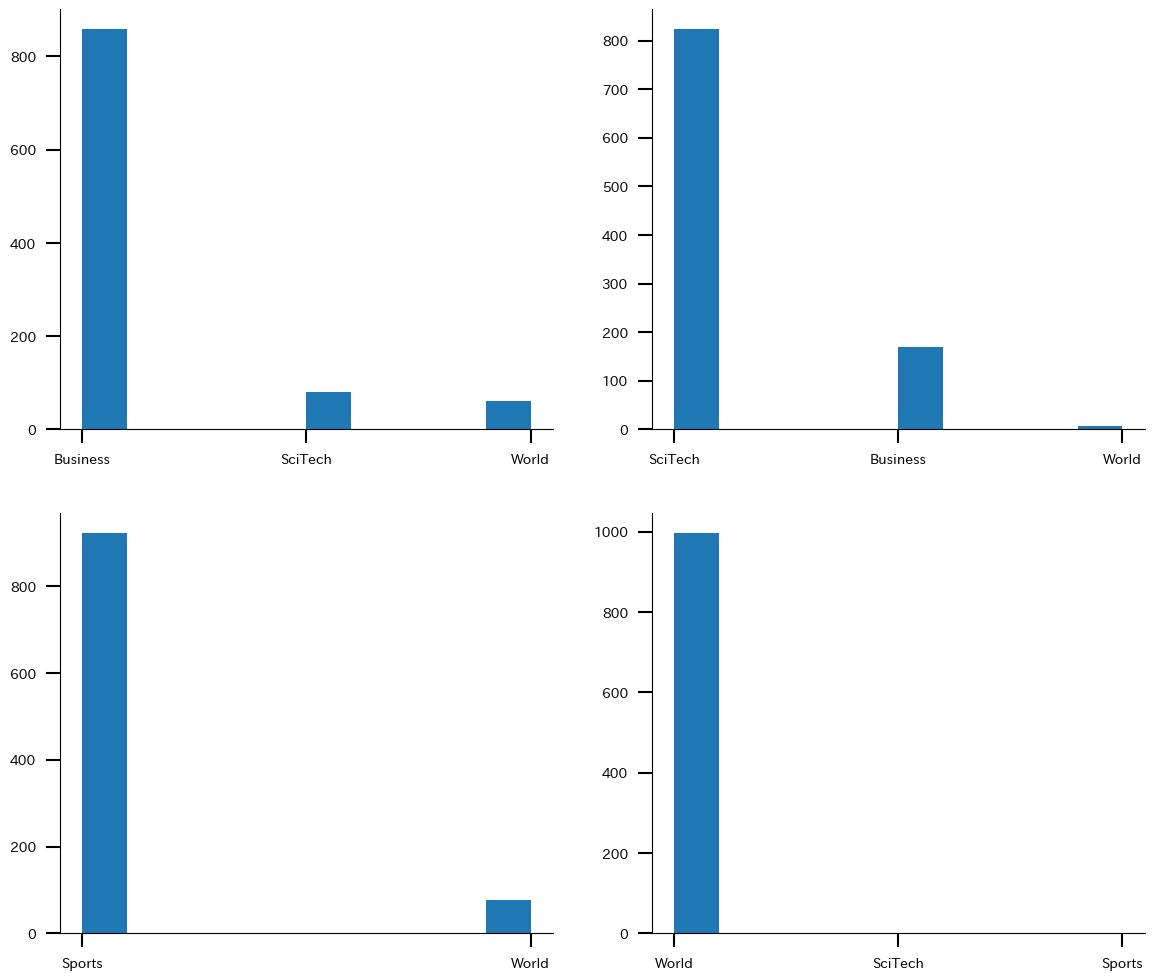

In [149]:
fig_path = f"../data/figure/{data_type}/top_text_sentenceBERT_{data_type}.pdf"
fig = plt.figure(figsize=(14, 12))

for i, class_num in enumerate([3, 0, 1, 2]):
    dist_df = pd.DataFrame(dist)
    top_index = getmax_rev(dist_df[class_num], topnum=1000, getmin=True, getindex=True)
    ax = fig.add_subplot(2, 2, i + 1)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.tick_params(which="both", width=1.5, length=8, size=10, direction="out")
    ax.xaxis.set_tick_params(labelsize=10, pad=7)
    ax.yaxis.set_tick_params(labelsize=10, pad=7)

    plt.hist(df.loc[top_index, "class"])
    fig.savefig(make_filepath(fig_path))

In [46]:
classes = ["Business", "Sports", "World", "SciTech"]

In [47]:
df_locs = {}
for class_num in range(class_nums):
    dist_df = pd.DataFrame(dist)
    top_index = getmax_rev(dist_df[class_num], topnum=30, getmin=True, getindex=True)

    df_loc = df.loc[top_index, :]
    df_locs[classes[class_num]] = df_loc

In [48]:
df_locs["Business"]

,class,title,text,words,words_nonstop
91768,SciTech,Gartner cuts fourth-quarter PC forecast,Budget competition from other consumer electro...,Budget competition from other consumer electro...,Budget competition consumer electronics device...
64096,SciTech,"Study: Software vendors, users at odds over li...",Software publishers and users are at odds abou...,Software publishers and users are at odds abou...,Software publishers users odds software licens...
42538,SciTech,Toshiba Has Big Plans for Small Drives,Company will begin production on sub-1-inch ha...,Company will begin production on sub-1-inch ha...,Company begin production sub-1-inch hard drive...
34708,SciTech,Microsoft banks on Money update,The software maker has released a downloadable...,The software maker has released a downloadable...,software maker released downloadable version f...
111388,SciTech,Nintendo DS Proves Popular,Company says sales of the handheld gaming devi...,Company says sales of the handheld gaming devi...,Company says sales handheld gaming device much...
12093,SciTech,Windows update harbors AMD conflict,Microsoft says SP2 may not work on computers p...,Microsoft says SP2 may not work on computers p...,Microsoft says SP2 may work computers powered ...
4046,SciTech,"Nortel to lay off 3,500",The scandal-beset company will also lay off ab...,The scandal-beset company will also lay off ab...,scandal-beset company also lay 10 percent work...
64287,SciTech,"Update: Study shows software vendors, users at...",InfoWorld - Software publishers and users are ...,InfoWorld - Software publishers and users are ...,InfoWorld Software publishers users odds softw...
82738,SciTech,Software piracy whistle-blowers get bigger rew...,The BSA trade group ups its reward for informa...,The BSA trade group ups its reward for informa...,BSA trade group ups reward information U.K. co...
15796,SciTech,Veritas Software Buys Email Backup Firm,"Veritas Software Corp. , the leading storage s...","Veritas Software Corp. , the leading storage s...",Veritas Software Corp. leading storage softwar...


In [49]:
df_locs["SciTech"]

,class,title,text,words,words_nonstop
106488,SciTech,Singingfish Unveils Multimedia Search Tool,"Consumers will be able to hunt for music, movi...","Consumers will be able to hunt for music , mov...",Consumers able hunt music movies news
101139,SciTech,Remember When You Wanted Your Own Ms. Pac-Man?,"When arcade games are in the recreation room, ...","When arcade games are in the recreation room ,...",arcade games recreation room coins necessary
60161,SciTech,First Look: OQO Handheld PC Fails to Excite,Design and performance issues hold back this v...,Design and performance issues hold back this v...,Design performance issues hold back cool idea
41422,SciTech,A Computer In Every Classroom,Schools are spending a fortune on technology i...,Schools are spending a fortune on technology i...,Schools spending fortune technology hopes gain...
17284,SciTech,Blunkett's satellite tagging: the tripe behind...,Home Office redefines statistical invalidity,Home Office redefines statistical invalidity,Home Office redefines statistical invalidity
18872,SciTech,Mission inside the fault zone,BBC correspondent David Shukman meets the scie...,BBC correspondent David Shukman meets the scie...,BBC correspondent David Shukman meets scientis...
29635,SciTech,Triumphant return of the big &lt;cite&gt;Reg&l...,&lt;strong&gt;Cash'n'Carrion&lt;/strong&gt; Cu...,& lt ; strong & gt ; Cash'n'Carrion & lt ; /st...,lt strong gt Cash'n'Carrion lt /strong gt Cue ...
48794,Business,Sugar business sours as US goes diet crazy,Mary Poppins was wrong. quot;A spoonful of su...,Mary Poppins was wrong . quot ; A spoonful of ...,Mary Poppins wrong quot spoonful sugar quot 39...
46493,Business,Window Dressing for Nudists,Cosmetically altered mutual funds don't make s...,Cosmetically altered mutual funds do n't make ...,Cosmetically altered mutual funds make sense '...
119840,World,The Talk Shows,&lt;em&gt; Guests to be interviewed today on...,& lt ; em & gt ; Guests to be interviewed toda...,lt em gt Guests interviewed today major televi...


In [50]:
df_locs["World"]

,class,title,text,words,words_nonstop
45490,Sports,UPDATE 3-Battling Woods in touch with Mount Ju...,Champion Tiger Woods battled through back pain...,Champion Tiger Woods battled through back pain...,Champion Tiger Woods battled back pain stay to...
73765,Sports,Fleming Becomes New Zealand #39;s Record Test ...,Stephen Fleming hit an unbeaten 137 against Ba...,Stephen Fleming hit an unbeaten 137 against Ba...,Stephen Fleming hit unbeaten 137 Bangladesh da...
22109,Sports,Falcons' Brooking Hoping to Play in Opener (AP),AP - Pro Bowl linebacker Keith Brooking hopes ...,AP - Pro Bowl linebacker Keith Brooking hopes ...,AP Pro Bowl linebacker Keith Brooking hopes pl...
8094,Sports,Bucks Re-Sign Forward Toni Kukoc (AP),AP - The Milwaukee Bucks on Monday re-signed f...,AP - The Milwaukee Bucks on Monday re-signed f...,AP Milwaukee Bucks Monday re-signed forward To...
39331,Sports,Hurricane Postpones Steelers-Dolphins Game (AP),AP - Hurricane Jeanne forced the postponement ...,AP - Hurricane Jeanne forced the postponement ...,AP Hurricane Jeanne forced postponement Sunday...
97927,Sports,"Cardinals Start Shaun King, Bench McCown (AP)",AP - The Arizona Cardinals benched quarterback...,AP - The Arizona Cardinals benched quarterback...,AP Arizona Cardinals benched quarterback Josh ...
114351,World,Real to finish bomb scare match,Real Madrid and Real Socieded will play the fi...,Real Madrid and Real Socieded will play the fi...,Real Madrid Real Socieded play final six minut...
22584,Sports,Dolphins' Bowens to Miss Opener Vs. Titans (AP),AP - Miami Dolphins defensive tackle Tim Bowen...,AP - Miami Dolphins defensive tackle Tim Bowen...,AP Miami Dolphins defensive tackle Tim Bowens ...
115298,Sports,NBA Wrap: O'Neal Pours in 40 as Heat Subdue Wi...,NEW YORK (Reuters) - Shaquille O'Neal scored ...,NEW YORK ( Reuters ) - Shaquille O'Neal scored...,NEW YORK Reuters Shaquille O'Neal scored seaso...
71184,Sports,"GAME 6: DETROIT 28, NY GIANTS 13","First score: Lions, on an 18-yard touchdown pa...","First score : Lions , on an 18-yard touchdown ...",First score Lions 18-yard touchdown pass quart...


In [51]:
df_locs["Sports"]

,class,title,text,words,words_nonstop
81076,World,Afghan kidnappers delay execution,"In Afghanistan, the militant group holding thr...","In Afghanistan , the militant group holding th...",Afghanistan militant group holding three UN wo...
70147,World,Police probe Kabul suicide attack,Afghan police are investigating a suicide gren...,Afghan police are investigating a suicide gren...,Afghan police investigating suicide grenade at...
19220,World,"Turkish Company to Leave Iraq, After Driver Ki...",A Turkish shipping company says it is withdraw...,A Turkish shipping company says it is withdraw...,Turkish shipping company says withdrawing Iraq...
41371,World,Pakistani president says killing of Al-Qaeda m...,"The Pakistani President, Pervez Musharraf, say...","The Pakistani President , Pervez Musharraf , s...",Pakistani President Pervez Musharraf says kill...
24543,World,Military Specialist Pleads Guilty to Abuse and...,The first American military intelligence speci...,The first American military intelligence speci...,first American military intelligence specialis...
82385,World,US military 'seals off Falluja',The US military closes all roads into the Iraq...,The US military closes all roads into the Iraq...,US military closes roads Iraqi city Falluja am...
20694,World,Sudan Peace Talks Stuck on Issues of Security,"Reports from the Nigerian capital Abuja, where...","Reports from the Nigerian capital Abuja , wher...",Reports Nigerian capital Abuja Sudan peace tal...
116838,World,Fresh clashes in Nepal 'kill 26',At least 26 people die in clashes between secu...,At least 26 people die in clashes between secu...,least 26 people die clashes security forces Ma...
112489,World,"Mubarak, Obasanjo discuss bilateral ties, Afri...",AFP - Egyptian President Hosni Mubarak met wit...,AFP - Egyptian President Hosni Mubarak met wit...,AFP Egyptian President Hosni Mubarak met Niger...
46142,World,Afghan refugees register to vote,Afghan refugees living in Pakistan are registe...,Afghan refugees living in Pakistan are registe...,Afghan refugees living Pakistan registering ta...


In [29]:
df_locs = {}
for class_num in range(class_nums):
    dist_df = pd.DataFrame(dist)
    top_index = getmax_rev(dist_df[class_num], topnum=7, getmin=True, getindex=True)

    df_loc = df.loc[top_index, :]
    df_locs[classes[class_num]] = df_loc

In [30]:
top_texts = pd.DataFrame([df_locs[_class].loc[:, "text"].to_numpy() for _class in classes]).T

In [31]:
top_text_chart = top_texts

In [32]:
top_text_chart.index = top_text_chart.index + 1

In [ ]:
#世界，科学/技術，スポーツ，ビジネス

In [146]:
top_text_chart = top_text_chart.reindex(columns=[3, 0, 1, 2])

In [147]:
print(
    top_text_chart.style.format("\\textit{{{}}}", precision=3, escape="latex").to_latex(
        column_format="p{1cm}p{3.5cm}p{3.5cm}p{3.5cm}p{3.5cm}",
        position="ht",
        position_float="centering",
        hrules=True,
        caption="提案手法2で高い確信度(確率)で分類された文書(AgTitle)",
        label="table:sentence_list_SBERT",
        multicol_align="r",
    )
)

\begin{table}[ht]
\centering
\caption{提案手法2で高い確信度(確率)で分類された文書(AgTitle)}
\label{table:sentence_list_SBERT}
\begin{tabular}{p{1cm}p{3.5cm}p{3.5cm}p{3.5cm}p{3.5cm}}
\toprule
 & 3 & 0 & 1 & 2 \\
\midrule
1 & \textit{Gaza Violence Kills Four Palestinians (AP)} & \textit{IBM \#39;s PC business up for sale} & \textit{Braves Edge Dodgers 6-5 (AP)} & \textit{Stocks rise as oil prices fall} \\
2 & \textit{Sharon \#39;s Gaza plan hinges on vote} & \textit{IBM to Put Its PC Business Up for Sale} & \textit{Rangers Beat Staggering Orioles 6-4 (AP)} & \textit{Oracle Buys PeopleSoft for \textbackslash \$10.3 Billion} \\
3 & \textit{Car Bomb Kills at Least Seven in Baghdad} & \textit{Report: IBM \#39;s PC business up for sale} & \textit{Woods woeful in Ryder Cup} & \textit{Oracle Buys PeopleSoft for \textbackslash \$10.3 Billion} \\
4 & \textit{Baghdad Suicide Car Bomb Kills at Least Four} & \textit{IBM Sells Its PC Business} & \textit{Montgomerie Triumphs in Ryder Cup (AP)} & \textit{Oracle Buys Peopl

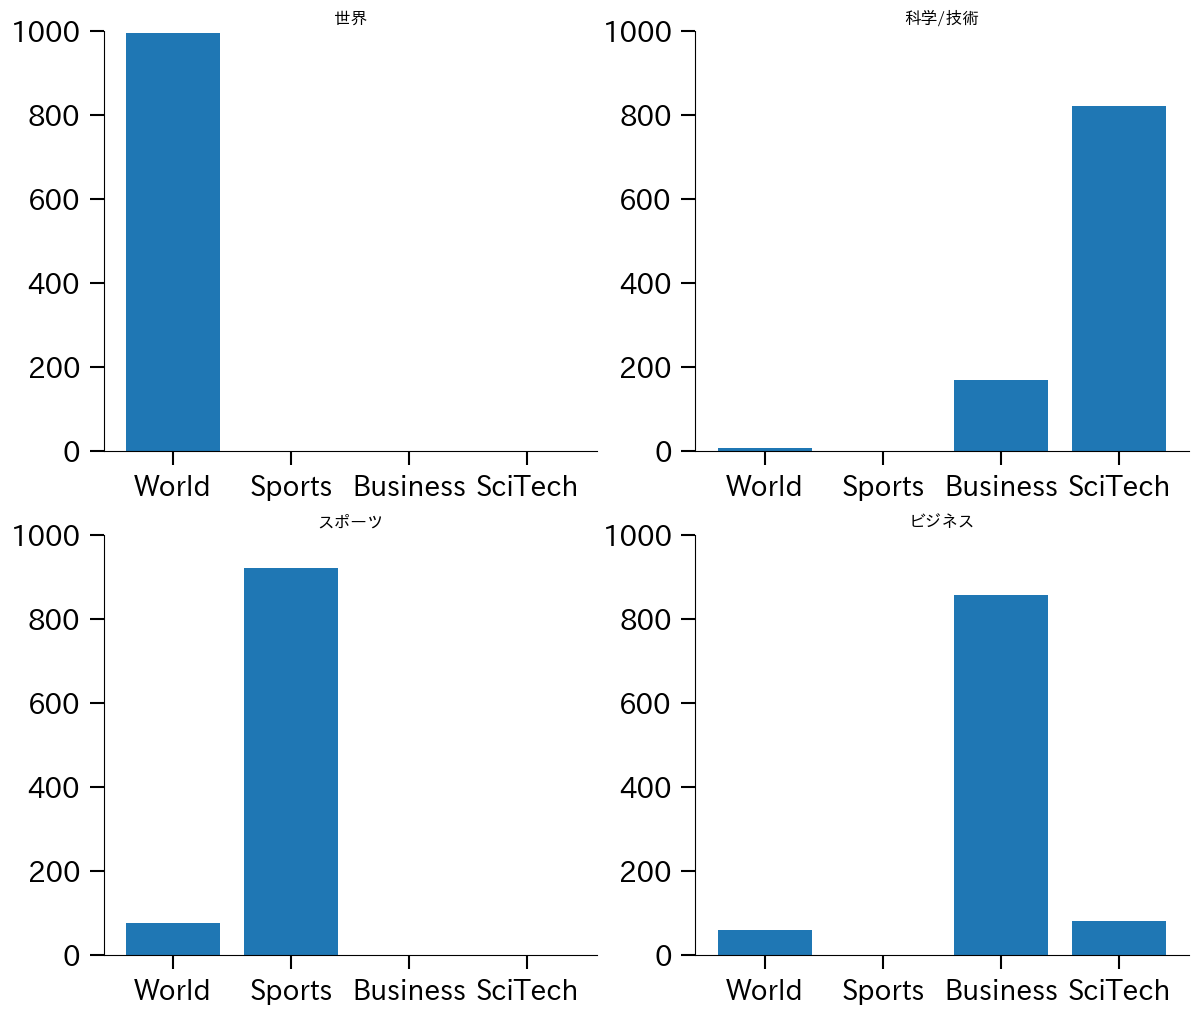

In [155]:
fig_path = f"../data/figure/{data_type}/top_text_{vectorize_type}_{data_type}.pdf"
fig = plt.figure(figsize=(14, 12))


for i, class_num in enumerate([2, 0, 1, 3]):
    dist_df = pd.DataFrame(dist)
    top_index = getmax_rev(dist_df[class_num], topnum=1000, getmin=True, getindex=True)
    ax = fig.add_subplot(2, 2, i + 1)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.tick_params(which="both", width=1.5, length=8, size=10, direction="out")
    ax.xaxis.set_tick_params(labelsize=20, pad=7)
    ax.yaxis.set_tick_params(labelsize=20, pad=7)
    ax.set_title(["世界", "科学/技術", "スポーツ", "ビジネス"][i])
    
    ax.set_ylim(0, 1000)

    plt.bar(*zip(*{class_label :(df.loc[top_index, "class"]==class_label).sum() for class_label in class_labels[0]}.items()))
    fig.savefig(make_filepath(fig_path))